In [3]:
import pandas as pd
import networkx as nx
import pickle
import json
import collections
import plotly.express as px
import matplotlib.pyplot as plt

## Make the graph

In [4]:
DG = nx.DiGraph()
p1 = "/datadrive/pavan/az_storage/data_unorganized/skill_graph/age_0_5.csv"
p2 = "/datadrive/pavan/az_storage/data_unorganized/skill_graph/age_5_11.csv"
p3 = "/datadrive/pavan/az_storage/data_unorganized/skill_graph/age_11_14.csv"

In [5]:
dd = pd.read_csv(p1, encoding="utf-8")
dd.columns = dd.columns.str.strip()
all_nan_rows = dd[dd.isna().all(axis=1)]
dd.ffill(inplace=True)

In [ ]:
s=0
df = dd
for skill in df["Skills"].unique():
    skill_df = df[df["Skills"] == skill]
    DG.add_node(f"s{s}", label=skill, type="skill", age_group="0-5", 
                modality_textual=None, perspective=None, require_multimodal_context=None,
                embodied=None, stage_labels=[])
    ss = 0
    for subskill in skill_df["Sub-skills"].unique():
        g = 0
        subskill_df = skill_df[skill_df["Sub-skills"] == subskill]
        DG.add_node(f"s{s}_ss{ss}", label=subskill, type="sub-skill", age_group="0-5", 
                modality_textual=None, perspective=None, require_multimodal_context=None,
                embodied=None, stage_labels=[])
        DG.add_edge(f"s{s}_ss{ss}", f"s{s}", type="hierarchy", label="is part of")
        for goal in subskill_df["Goals"].unique():
            i = 0
            DG.add_node(f"s{s}_ss{ss}_g{g}", label=goal, type="goal", age_group="0-5", 
                modality_textual=None, perspective=None, require_multimodal_context=None,
                embodied=None, stage_labels=[])
            DG.add_edge(f"s{s}_ss{ss}_g{g}", f"s{s}_ss{ss}", type="hierarchy", label="is part of")
            goal_df = subskill_df[subskill_df["Goals"] == goal]
            for stage in ["stage-0"]:
                for indicator in goal_df[stage].unique():
                    DG.add_node(f"s{s}_ss{ss}_g{g}_i{i}", label=indicator, type="indicator", age_group="0-5", 
                        modality_textual=None, perspective=None, require_multimodal_context=None,
                        embodied=None, stage_labels=[int(stage.split("-")[1])])
                    DG.add_edge(f"s{s}_ss{ss}_g{g}_i{i}", f"s{s}_ss{ss}_g{g}", type="hierarchy", label="is part of")
                    i += 1
            g += 1
        ss += 1
    s += 1    

In [ ]:
dd = pd.read_csv(p2, encoding="utf-8")
dd.columns = dd.columns.str.strip()
all_nan_rows = dd[dd.isna().all(axis=1)]
dd.ffill(inplace=True)

In [ ]:
df = dd.iloc[:298, :]
for skill in df["Skills"].unique():
    skill_df = df[df["Skills"] == skill]
    DG.add_node(f"s{s}", label=skill, type="skill", age_group="5-11", 
                modality_textual=None, perspective=None, require_multimodal_context=None,
                embodied=None, stage_labels=[])
    ss = 0
    for subskill in skill_df["Sub-skills"].unique():
        g = 0
        subskill_df = skill_df[skill_df["Sub-skills"] == subskill]
        DG.add_node(f"s{s}_ss{ss}", label=subskill, type="sub-skill", age_group="5-11", 
                modality_textual=None, perspective=None, require_multimodal_context=None,
                embodied=None, stage_labels=[])
        DG.add_edge(f"s{s}_ss{ss}", f"s{s}", type="hierarchy", label="is part of")
        for goal in subskill_df["Goals"].unique():
            i = 0
            DG.add_node(f"s{s}_ss{ss}_g{g}", label=goal, type="goal", age_group="5-11", 
                modality_textual=None, perspective=None, require_multimodal_context=None,
                embodied=None, stage_labels=[])
            DG.add_edge(f"s{s}_ss{ss}_g{g}", f"s{s}_ss{ss}", type="hierarchy", label="is part of")
            goal_df = subskill_df[subskill_df["Goals"] == goal]
            for stage in ["stage-1", "stage-2", "stage-3", "stage-4", "stage-5", "stage-6"]:
                for indicator in goal_df[stage].unique():
                    DG.add_node(f"s{s}_ss{ss}_g{g}_i{i}", label=indicator, type="indicator", age_group="5-11", 
                        modality_textual=None, perspective=None, require_multimodal_context=None,
                        embodied=None, stage_labels=[int(stage.split("-")[1])])
                    DG.add_edge(f"s{s}_ss{ss}_g{g}_i{i}", f"s{s}_ss{ss}_g{g}", type="hierarchy", label="is part of")
                    i += 1
            g += 1
        ss += 1
    s += 1    

In [ ]:
ds = dd.iloc[298:381, :]
for skill in ds["Skills"].unique():
    skill_ds = ds[ds["Skills"] == skill]
    DG.add_node(f"s{s}", label=skill, type="skill", age_group="5-11", 
                modality_textual=None, perspective=None, require_multimodal_context=None,
                embodied=None, stage_labels=[])
    ss = 0
    for subskill in skill_ds["Sub-skills"].unique():
        g = 0
        subskill_ds = skill_ds[skill_ds["Sub-skills"] == subskill]
        DG.add_node(f"s{s}_ss{ss}", label=subskill, type="sub-skill", age_group="5-11", 
                modality_textual=None, perspective=None, require_multimodal_context=None,
                embodied=None, stage_labels=[])
        DG.add_edge(f"s{s}_ss{ss}", f"s{s}", type="hierarchy", label="is part of")
        for goal in subskill_ds["Goals"].unique():
            i = 0
            DG.add_node(f"s{s}_ss{ss}_g{g}", label=goal, type="goal", age_group="5-11", 
                modality_textual=None, perspective=None, require_multimodal_context=None,
                embodied=None, stage_labels=[])
            DG.add_edge(f"s{s}_ss{ss}_g{g}", f"s{s}_ss{ss}", type="hierarchy", label="is part of")
            goal_ds = subskill_ds[subskill_ds["Goals"] == goal]
            for stage in ["stage-1", "stage-4"]:
                for indicator in goal_ds[stage].unique():
                    if stage == "stage-1":
                        DG.add_node(f"s{s}_ss{ss}_g{g}_i{i}", label=indicator, type="indicator", age_group="5-11", 
                            modality_textual=None, perspective=None, require_multimodal_context=None,
                            embodied=None, stage_labels=[1,2,3])
                    else:
                        DG.add_node(f"s{s}_ss{ss}_g{g}_i{i}", label=indicator, type="indicator", age_group="5-11", 
                            modality_textual=None, perspective=None, require_multimodal_context=None,
                            embodied=None, stage_labels=[4,5,6])
                    DG.add_edge(f"s{s}_ss{ss}_g{g}_i{i}", f"s{s}_ss{ss}_g{g}", type="hierarchy", label="is part of")
                    i += 1
            g += 1
        ss += 1
    s += 1    
                

In [ ]:
dm = dd.iloc[381:400, :]
for skill in dm["Skills"].unique():
    skill_dm = dm[dm["Skills"] == skill]
    DG.add_node(f"s{s}", label=skill, type="skill", age_group="5-11", 
                modality_textual=None, perspective=None, require_multimodal_context=None,
                embodied=None, stage_labels=[])
    ss = 0
    for subskill in skill_dm["Sub-skills"].unique():
        g = 0
        subskill_dm = skill_dm[skill_dm["Sub-skills"] == subskill]
        DG.add_node(f"s{s}_ss{ss}", label=subskill, type="sub-skill", age_group="5-11", 
                modality_textual=None, perspective=None, require_multimodal_context=None,
                embodied=None, stage_labels=[])
        DG.add_edge(f"s{s}_ss{ss}", f"s{s}", type="hierarchy", label="is part of")
        for goal in subskill_dm["Goals"].unique():
            i = 0
            DG.add_node(f"s{s}_ss{ss}_g{g}", label=goal, type="goal", age_group="5-11", 
                modality_textual=None, perspective=None, require_multimodal_context=None,
                embodied=None, stage_labels=[])
            DG.add_edge(f"s{s}_ss{ss}_g{g}", f"s{s}_ss{ss}", type="hierarchy", label="is part of")
            goal_dm = subskill_dm[subskill_dm["Goals"] == goal]
            for stage in ["stage-1", "stage-2", "stage-3", "stage-5"]:
                for indicator in goal_dm[stage].unique():
                    if stage == "stage-5":
                        DG.add_node(f"s{s}_ss{ss}_g{g}_i{i}", label=indicator, type="indicator", age_group="5-11", 
                            modality_textual=None, perspective=None, require_multimodal_context=None,
                            embodied=None, stage_labels=[5,6])
                    elif stage == "stage-3":
                        DG.add_node(f"s{s}_ss{ss}_g{g}_i{i}", label=indicator, type="indicator", age_group="5-11", 
                            modality_textual=None, perspective=None, require_multimodal_context=None,
                            embodied=None, stage_labels=[3,4])
                    else:
                        DG.add_node(f"s{s}_ss{ss}_g{g}_i{i}", label=indicator, type="indicator", age_group="5-11", 
                            modality_textual=None, perspective=None, require_multimodal_context=None,
                            embodied=None, stage_labels=[int(stage.split("-")[1])])
                    DG.add_edge(f"s{s}_ss{ss}_g{g}_i{i}", f"s{s}_ss{ss}_g{g}", type="hierarchy", label="is part of")
                    i += 1
            g += 1
        ss += 1
    s += 1    
                

In [ ]:
dn = dd.iloc[400:, :]
for skill in dn["Skills"].unique():
    skill_dn = dn[dn["Skills"] == skill]
    DG.add_node(f"s{s}", label=skill, type="skill", age_group="5-11", 
                modality_textual=None, perspective=None, require_multimodal_context=None,
                embodied=None, stage_labels=[])
    ss = 0
    for subskill in skill_dn["Sub-skills"].unique():
        g = 0
        subskill_dn = skill_dn[skill_dn["Sub-skills"] == subskill]
        DG.add_node(f"s{s}_ss{ss}", label=subskill, type="sub-skill", age_group="5-11", 
                modality_textual=None, perspective=None, require_multimodal_context=None,
                embodied=None, stage_labels=[])
        DG.add_edge(f"s{s}_ss{ss}", f"s{s}", type="hierarchy", label="is part of")
        for goal in subskill_dn["Goals"].unique():
            i = 0
            DG.add_node(f"s{s}_ss{ss}_g{g}", label=goal, type="goal", age_group="5-11", 
                modality_textual=None, perspective=None, require_multimodal_context=None,
                embodied=None, stage_labels=[])
            DG.add_edge(f"s{s}_ss{ss}_g{g}", f"s{s}_ss{ss}", type="hierarchy", label="is part of")
            goal_dn = subskill_dn[subskill_dn["Goals"] == goal]
            for stage in ["stage-1", "stage-2", "stage-3", "stage-4", "stage-5", "stage-6"]:
                for indicator in goal_dn[stage].unique():
                    DG.add_node(f"s{s}_ss{ss}_g{g}_i{i}", label=indicator, type="indicator", age_group="5-11", 
                        modality_textual=None, perspective=None, require_multimodal_context=None,
                        embodied=None, stage_labels=[int(stage.split("-")[1])])
                    DG.add_edge(f"s{s}_ss{ss}_g{g}_i{i}", f"s{s}_ss{ss}_g{g}", type="hierarchy", label="is part of")
                    i += 1
            g += 1
        ss += 1
    s += 1    

In [ ]:
dd = pd.read_csv(p3, encoding="utf-8")
dd.columns = dd.columns.str.strip()
all_nan_rows = dd[dd.isna().all(axis=1)]
dd.ffill(inplace=True)

In [ ]:
df = dd.iloc[:220,:]
for skill in df["Skills"].unique():
    skill_df = df[df["Skills"] == skill]
    DG.add_node(f"s{s}", label=skill, type="skill", age_group="11-14", 
                modality_textual=None, perspective=None, require_multimodal_context=None,
                embodied=None, stage_labels=[])
    ss = 0
    for subskill in skill_df["Sub-skills"].unique():
        g = 0
        subskill_df = skill_df[skill_df["Sub-skills"] == subskill]
        DG.add_node(f"s{s}_ss{ss}", label=subskill, type="sub-skill", age_group="11-14", 
                modality_textual=None, perspective=None, require_multimodal_context=None,
                embodied=None, stage_labels=[])
        DG.add_edge(f"s{s}_ss{ss}", f"s{s}", type="hierarchy", label="is part of")
        for goal in subskill_df["Goal"].unique():
            i = 0
            DG.add_node(f"s{s}_ss{ss}_g{g}", label=goal, type="goal", age_group="11-14", 
                modality_textual=None, perspective=None, require_multimodal_context=None,
                embodied=None, stage_labels=[])
            DG.add_edge(f"s{s}_ss{ss}_g{g}", f"s{s}_ss{ss}", type="hierarchy", label="is part of")
            goal_df = subskill_df[subskill_df["Goal"] == goal]
            for stage in ["Stage-7", "Stage-8", "Stage-9"]:
                for indicator in goal_df[stage].unique():
                    DG.add_node(f"s{s}_ss{ss}_g{g}_i{i}", label=indicator, type="indicator", age_group="11-14", 
                        modality_textual=None, perspective=None, require_multimodal_context=None,
                        embodied=None, stage_labels=[int(stage.split("-")[1])])
                    DG.add_edge(f"s{s}_ss{ss}_g{g}_i{i}", f"s{s}_ss{ss}_g{g}", type="hierarchy", label="is part of")
                    i += 1
            g += 1
        ss += 1
    s += 1    

In [ ]:
ds = dd.iloc[220:239,:]
for skill in ds["Skills"].unique():
    skill_ds = ds[ds["Skills"] == skill]
    DG.add_node(f"s{s}", label=skill, type="skill", age_group="11-14", 
                modality_textual=None, perspective=None, require_multimodal_context=None,
                embodied=None, stage_labels=[])
    ss = 0
    for subskill in skill_ds["Sub-skills"].unique():
        g = 0
        subskill_ds = skill_ds[skill_ds["Sub-skills"] == subskill]
        DG.add_node(f"s{s}_ss{ss}", label=subskill, type="sub-skill", age_group="11-14", 
                modality_textual=None, perspective=None, require_multimodal_context=None,
                embodied=None, stage_labels=[])
        DG.add_edge(f"s{s}_ss{ss}", f"s{s}", type="hierarchy", label="is part of")
        for goal in subskill_ds["Goal"].unique():
            i = 0
            DG.add_node(f"s{s}_ss{ss}_g{g}", label=goal, type="goal", age_group="11-14", 
                modality_textual=None, perspective=None, require_multimodal_context=None,
                embodied=None, stage_labels=[])
            DG.add_edge(f"s{s}_ss{ss}_g{g}", f"s{s}_ss{ss}", type="hierarchy", label="is part of")
            goal_ds = subskill_ds[subskill_ds["Goal"] == goal]
            for stage in ["Stage-7", "Stage-9"]:
                for indicator in goal_ds[stage].unique():
                    if stage == "Stage-7":
                        DG.add_node(f"s{s}_ss{ss}_g{g}_i{i}", label=indicator, type="indicator", age_group="11-14", 
                            modality_textual=None, perspective=None, require_multimodal_context=None,
                            embodied=None, stage_labels=[7,8])
                    else:
                        DG.add_node(f"s{s}_ss{ss}_g{g}_i{i}", label=indicator, type="indicator", age_group="11-14", 
                            modality_textual=None, perspective=None, require_multimodal_context=None,
                            embodied=None, stage_labels=[9])
                    DG.add_edge(f"s{s}_ss{ss}_g{g}_i{i}", f"s{s}_ss{ss}_g{g}", type="hierarchy", label="is part of")
                    i += 1
            g += 1
        ss += 1
    s += 1    
                

In [ ]:
ds = dd.iloc[239:320,:]
for skill in ds["Skills"].unique():
    skill_ds = ds[ds["Skills"] == skill]
    DG.add_node(f"s{s}", label=skill, type="skill", age_group="11-14", 
                modality_textual=None, perspective=None, require_multimodal_context=None,
                embodied=None, stage_labels=[])
    ss = 0
    for subskill in skill_ds["Sub-skills"].unique():
        g = 0
        subskill_ds = skill_ds[skill_ds["Sub-skills"] == subskill]
        DG.add_node(f"s{s}_ss{ss}", label=subskill, type="sub-skill", age_group="11-14", 
                modality_textual=None, perspective=None, require_multimodal_context=None,
                embodied=None, stage_labels=[])
        DG.add_edge(f"s{s}_ss{ss}", f"s{s}", type="hierarchy", label="is part of")
        for goal in subskill_ds["Goal"].unique():
            i = 0
            DG.add_node(f"s{s}_ss{ss}_g{g}", label=goal, type="goal", age_group="11-14", 
                modality_textual=None, perspective=None, require_multimodal_context=None,
                embodied=None, stage_labels=[])
            DG.add_edge(f"s{s}_ss{ss}_g{g}", f"s{s}_ss{ss}", type="hierarchy", label="is part of")
            goal_ds = subskill_ds[subskill_ds["Goal"] == goal]
            for stage in ["Stage-7"]:
                for indicator in goal_ds[stage].unique():
                    if stage == "Stage-7":
                        DG.add_node(f"s{s}_ss{ss}_g{g}_i{i}", label=indicator, type="indicator", age_group="11-14", 
                            modality_textual=None, perspective=None, require_multimodal_context=None,
                            embodied=None, stage_labels=[7,8,9])
                    DG.add_edge(f"s{s}_ss{ss}_g{g}_i{i}", f"s{s}_ss{ss}_g{g}", type="hierarchy", label="is part of")
                    i += 1
            g += 1
        ss += 1
    s += 1    
                

In [ ]:
df = dd.iloc[320:,:]
for skill in df["Skills"].unique():
    skill_df = df[df["Skills"] == skill]
    DG.add_node(f"s{s}", label=skill, type="skill", age_group="11-14", 
                modality_textual=None, perspective=None, require_multimodal_context=None,
                embodied=None, stage_labels=[])
    ss = 0
    for subskill in skill_df["Sub-skills"].unique():
        g = 0
        subskill_df = skill_df[skill_df["Sub-skills"] == subskill]
        DG.add_node(f"s{s}_ss{ss}", label=subskill, type="sub-skill", age_group="11-14", 
                modality_textual=None, perspective=None, require_multimodal_context=None,
                embodied=None, stage_labels=[])
        DG.add_edge(f"s{s}_ss{ss}", f"s{s}", type="hierarchy", label="is part of")
        for goal in subskill_df["Goal"].unique():
            i = 0
            DG.add_node(f"s{s}_ss{ss}_g{g}", label=goal, type="goal", age_group="11-14", 
                modality_textual=None, perspective=None, require_multimodal_context=None,
                embodied=None, stage_labels=[])
            DG.add_edge(f"s{s}_ss{ss}_g{g}", f"s{s}_ss{ss}", type="hierarchy", label="is part of")
            goal_df = subskill_df[subskill_df["Goal"] == goal]
            for stage in ["Stage-7", "Stage-8", "Stage-9"]:
                for indicator in goal_df[stage].unique():
                    DG.add_node(f"s{s}_ss{ss}_g{g}_i{i}", label=indicator, type="indicator", age_group="11-14", 
                        modality_textual=None, perspective=None, require_multimodal_context=None,
                        embodied=None, stage_labels=[int(stage.split("-")[1])])
                    DG.add_edge(f"s{s}_ss{ss}_g{g}_i{i}", f"s{s}_ss{ss}_g{g}", type="hierarchy", label="is part of")
                    i += 1
            g += 1
        ss += 1
    s += 1    

In [ ]:
DG.nodes(data=True)
# find all nodes of type "skill"
skill_nodes = [n for n, d in DG.nodes(data=True) if d['type'] == "skill"]
print(skill_nodes)

In [ ]:
len(DG.nodes()), len(DG.edges())

In [ ]:
llm_data = [{"id":n, **d} for n, d in DG.nodes(data=True) if d["type"] == "indicator"]

In [ ]:
len(llm_data)

In [ ]:
llm_data[30]

In [ ]:
from itertools import combinations

perm_llm_data = list(combinations(llm_data, 2))
print(len(perm_llm_data))

In [ ]:
seed_data = []
for i in range(len(perm_llm_data)):
    seed_data.append({
                "id_1": perm_llm_data[i][0]["id"],
                "id_2": perm_llm_data[i][1]["id"],
                "label_1": perm_llm_data[i][0]["label"],
                "label_2": perm_llm_data[i][1]["label"],
            })

In [ ]:
seed_data[0]

In [ ]:
import json

#divide the data into 8 parts
chunk_size = len(seed_data) // 8
chunks = [seed_data[i:i + chunk_size] for i in range(0, len(seed_data), chunk_size)]


In [ ]:
# save each chunk to a separate file
for i, chunk in enumerate(chunks):
    with open(f"/datadrive/pavan/az_storage/data_unorganized/skill_graph/dependency_edge_seed_{i}.jsonl", "w") as f:
        json.dump(chunk, f, indent=4)

In [ ]:
import pickle
with open("/datadrive/pavan/az_storage/data_unorganized/skill_graph/skill_graph_corrected.pkl", "wb") as f:
    pickle.dump(DG, f)

In [ ]:
len(seed_data)

## Graph stats before dependency

In [6]:
# load the graph from pkl
with open("/datadrive/pavan/az_storage/data_unorganized/skill_graph/skill_graph_corrected.pkl", "rb") as f:
    DG = pickle.load(f)

In [7]:
print("Total number of nodes in the graph:", len(DG.nodes()))
print("Total number of edges in the graph before dependency analysis:", len(DG.edges()))
print("Average degree of the graph before dependency analysis:", sum(dict(DG.degree()).values()) / len(DG.nodes()))

Total number of nodes in the graph: 3118
Total number of edges in the graph before dependency analysis: 3097
Average degree of the graph before dependency analysis: 1.986529826812059


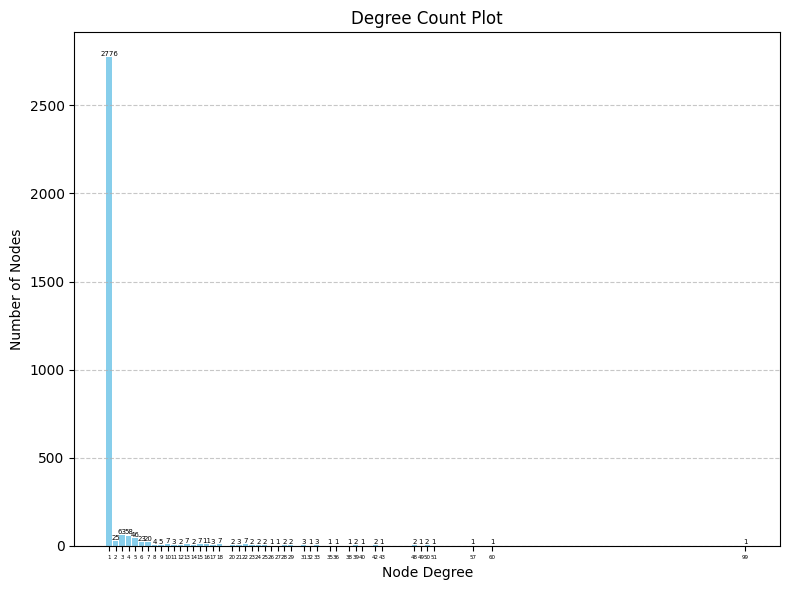

In [12]:
degree_count = collections.Counter(dict(DG.degree()).values())
degree_data = sorted(degree_count.items())  # List of (degree, count)

# Separate into X and Y for plotting
degrees, counts = zip(*degree_data)

# Create bar plot
plt.figure(figsize=(8, 6))
bars = plt.bar(degrees, counts, color='skyblue')

# Add text labels above bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.5, str(height),
             ha='center', va='bottom', fontsize=5)

# Customize axes and title
plt.xlabel("Node Degree")
plt.ylabel("Number of Nodes")
plt.title("Degree Count Plot")
plt.xticks(degrees, fontsize=4)  # Ensure all degrees are shown
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [13]:


# Assume G is your large directed graph
G = DG
# G.add_edges_from(...)  # Your data here

# Basic summary
print("Is Directed:", G.is_directed())
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())

# Degree stats
in_degrees = dict(G.in_degree())
out_degrees = dict(G.out_degree())

print("Max in-degree:", max(in_degrees.values()))
print("Max out-degree:", max(out_degrees.values()))
print("Average in-degree:", sum(in_degrees.values()) / G.number_of_nodes())
print("Average out-degree:", sum(out_degrees.values()) / G.number_of_nodes())

# Top nodes by in/out-degree
top_in = sorted(in_degrees.items(), key=lambda x: x[1], reverse=True)[:10]
top_out = sorted(out_degrees.items(), key=lambda x: x[1], reverse=True)[:10]
print("Top 10 nodes by in-degree:", top_in)
print("Top 10 nodes by out-degree:", top_out)

# Graph structure
print("Is acyclic (DAG)?", nx.is_directed_acyclic_graph(G))
print("Number of strongly connected components:", nx.number_strongly_connected_components(G))
print("Number of weakly connected components:", nx.number_weakly_connected_components(G))

# If the graph is not a DAG, show one small cycle (if any)
if not nx.is_directed_acyclic_graph(G):
    try:
        cycle = next(nx.simple_cycles(G))
        print("Sample cycle:", cycle)
    except StopIteration:
        print("No simple cycles found.")

# Component size stats
sccs = list(nx.strongly_connected_components(G))
largest_scc = max(sccs, key=len)
print("Size of largest strongly connected component:", len(largest_scc))

# Optional: PageRank or centrality
pagerank = nx.pagerank(G, alpha=0.85)
top_pagerank = sorted(pagerank.items(), key=lambda x: x[1], reverse=True)[:10]
print("Top 10 nodes by PageRank:", top_pagerank)


Is Directed: True
Number of nodes: 3118
Number of edges: 3097
Max in-degree: 98
Max out-degree: 1
Average in-degree: 0.9932649134060295
Average out-degree: 0.9932649134060295
Top 10 nodes by in-degree: [('s7_ss0_g4', 98), ('s8_ss1_g1', 59), ('s10_ss1_g0', 56), ('s7_ss1_g2', 50), ('s7_ss1_g0', 49), ('s8_ss0_g4', 49), ('s7_ss0_g2', 48), ('s8_ss0_g1', 47), ('s10_ss0_g0', 47), ('s7_ss1_g4', 42)]
Top 10 nodes by out-degree: [('s0_ss0', 1), ('s0_ss0_g0', 1), ('s0_ss0_g0_i0', 1), ('s0_ss0_g0_i1', 1), ('s0_ss0_g1', 1), ('s0_ss0_g1_i0', 1), ('s0_ss0_g1_i1', 1), ('s0_ss0_g1_i2', 1), ('s0_ss0_g1_i3', 1), ('s0_ss0_g1_i4', 1)]
Is acyclic (DAG)? True
Number of strongly connected components: 3118
Number of weakly connected components: 21
Size of largest strongly connected component: 1
Top 10 nodes by PageRank: [('s7', 0.038810079247536676), ('s9', 0.021054260861744754), ('s7_ss0', 0.019843055556460293), ('s8', 0.01970215621421213), ('s7_ss1', 0.01751703753537059), ('s15', 0.015401751289547357), ('s20

In [14]:

# Get all weakly connected components
wccs = list(nx.weakly_connected_components(G))

print(f"Number of weakly connected components: {len(wccs)}")
print("Weakly connected components (showing up to 5):")
for i, component in enumerate(wccs[:5]):
    print(f"Component {i+1} (size {len(component)}):", component)

# (Optional) If you want to sort by size
sorted_wccs = sorted(wccs, key=lambda x: len(x), reverse=True)
print("\nLargest weakly connected component size:", len(sorted_wccs[0]))

Number of weakly connected components: 21
Weakly connected components (showing up to 5):
Component 1 (size 35): {'s0_ss1_g1_i0', 's0_ss1_g2', 's0_ss0_g1_i4', 's0_ss2_g1_i2', 's0_ss0_g1_i2', 's0_ss2_g1', 's0_ss1', 's0_ss0_g1_i0', 's0_ss2_g1_i4', 's0_ss1_g1_i1', 's0_ss1_g0_i0', 's0_ss2_g0', 's0_ss0_g1_i3', 's0_ss1_g0', 's0_ss2_g0_i2', 's0_ss1_g2_i0', 's0_ss0_g1_i1', 's0_ss0_g0', 's0_ss1_g1', 's0_ss2_g1_i1', 's0_ss1_g2_i2', 's0', 's0_ss2_g1_i3', 's0_ss2_g0_i3', 's0_ss0_g1', 's0_ss2_g0_i1', 's0_ss0_g0_i0', 's0_ss0_g0_i1', 's0_ss2_g1_i0', 's0_ss1_g0_i2', 's0_ss2', 's0_ss0', 's0_ss1_g2_i1', 's0_ss1_g0_i1', 's0_ss2_g0_i0'}
Component 2 (size 31): {'s1_ss2_g1_i2', 's1_ss0_g0_i0', 's1_ss3_g0_i1', 's1_ss2_g0_i1', 's1_ss0_g0_i2', 's1_ss2_g1_i0', 's1_ss1_g0_i1', 's1_ss1_g0', 's1_ss1_g1_i1', 's1_ss0_g0_i1', 's1_ss3_g0', 's1_ss3_g0_i2', 's1_ss3_g0_i4', 's1_ss2_g1_i1', 's1_ss3_g0_i3', 's1_ss1', 's1_ss3', 's1_ss2_g1', 's1_ss1_g0_i3', 's1_ss2_g0', 's1_ss2', 's1_ss0_g0', 's1_ss2_g0_i0', 's1_ss3_g0_i0', '

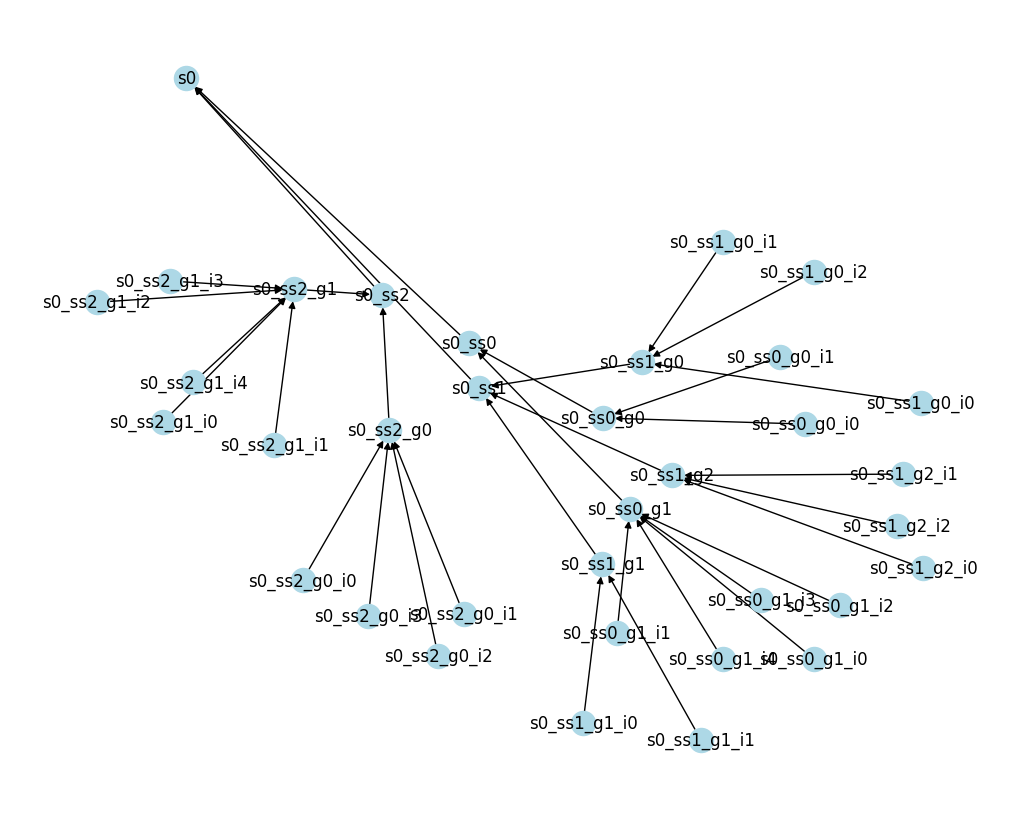

In [15]:

# Optional: visualization of a subgraph
sample_nodes = wccs[0]
subG = G.subgraph(sample_nodes)

plt.figure(figsize=(10, 8))
pos = nx.spring_layout(subG, seed=42)
nx.draw(subG, pos, with_labels=True, node_size=300, node_color="lightblue", arrows=True)
plt.show()

In [16]:
# Get all strongly connected components
sccs = list(nx.strongly_connected_components(G))

# Sort them by size in descending order
sorted_sccs = sorted(sccs, key=lambda x: len(x), reverse=True)

print(f"Number of strongly connected components: {len(sccs)}")
print("Top 5 largest strongly connected components:")
for i, component in enumerate(sorted_sccs[:5]):
    print(f"Component {i+1} (size {len(component)}):", component)

Number of strongly connected components: 3118
Top 5 largest strongly connected components:
Component 1 (size 1): {'s0'}
Component 2 (size 1): {'s0_ss0'}
Component 3 (size 1): {'s0_ss0_g0'}
Component 4 (size 1): {'s0_ss0_g0_i0'}
Component 5 (size 1): {'s0_ss0_g0_i1'}


In [17]:
# nodes with type skill
skill_nodes = [n for n, d in G.nodes(data=True) if d['type'] == "skill"]
print("Number of skill nodes:", len(skill_nodes))

Number of skill nodes: 21


## Add dependency edges

In [ ]:
#load the jsonl files
base_path = "/datadrive/pavan/az_storage/data_unorganized/skill_graph/dependency_edge_raw_"
# load all jsonl files
data = []
for i in range(9):
    with open(f"{base_path}{i}.jsonl", "r") as f:
        data.extend(json.load(f))

In [ ]:
len(data)

In [ ]:
all_dicts = [o for o in data if isinstance(o['output'], dict)]
non_dicts = [o for o in data if not isinstance(o['output'], dict)]
len(all_dicts), len(non_dicts)

In [ ]:
# Add the bad sample back to the main list
all_dicts.append({
    'output': {
        "edge" : True,
        "from" : "s7_ss1_g0_i27",
        "to" : "s7_ss1_g0_i37",
        "reason": "Understanding how to correctly use homophones which differ based on grammatical purpose is a foundational step to understanding homonyms, which are words with the same spelling but different meanings. Correctly applying homophones requires discerning meaning based on context, a skill also needed for homonyms."},
        'id_1': 's7_ss1_g0_i27',
        'id_2': 's7_ss1_g0_i37',
        'label_1': "Spell common homophones correctly to match their grammatical purpose, including they're, their, there.",
        'label_2': "Explore and use accurately words that have the same spelling but different meanings (homonyms), e.g. wave (hand gesture, hair curl, sea movement, etc.)."
})

In [ ]:
len(all_dicts)

In [ ]:
edges = [o for o in all_dicts if o['output']['edge']==True]
no_edges = [o for o in all_dicts if o['output']['edge']==False]
print(len(edges) + len(no_edges))

In [ ]:
valid_edges = []
invalid_edges = []
for edge in edges:
    given_list = [edge["id_1"], edge["id_2"]]
    if edge["output"]["from"] in given_list and edge["output"]["to"] in given_list:
        valid_edges.append(edge)
    else:
        invalid_edges.append(edge)
print("Valid edges:", len(valid_edges))
print("Invalid edges:", len(invalid_edges))

In [ ]:
invalid_edges

In [ ]:
invalid_edges[0]["output"]['to'] = invalid_edges[0]["id_2"]
valid_edges.append(invalid_edges[0])
invalid_edges.remove(invalid_edges[0])
print("Valid edges:", len(valid_edges))

In [ ]:
valid_edges[140]

In [ ]:
same_nodes = []
for i in range(len(valid_edges)):
    if valid_edges[i]["output"]["from"] == valid_edges[i]["output"]["to"]:
        same_nodes.append(valid_edges[i])
        valid_edges.remove(valid_edges[i])

In [ ]:
same_nodes = []
for i in range(len(valid_edges)):
    if valid_edges[i]["label_1"] == valid_edges[i]["label_2"]:
        same_nodes.append(valid_edges[i])
        # valid_edges.remove(valid_edges[i])
print("Same nodes:", len(same_nodes))

In [ ]:
for i in range(len(valid_edges)):
    DG.add_edge(valid_edges[i]['output']['from'], valid_edges[i]['output']['to'], type="dependency", label="is prerequisite of", reason=valid_edges[i]['output']['reason'])

In [ ]:
with open("/datadrive/pavan/az_storage/data_unorganized/skill_graph/skill_graph_with_dependency.pkl", "wb") as f:
    pickle.dump(DG, f)

## Graph stats after dependency edges

In [18]:
# load the graph from pkl
with open("/datadrive/pavan/az_storage/data_unorganized/skill_graph/skill_graph_with_dependency.pkl", "rb") as f:
    DG = pickle.load(f)

Total number of nodes in the graph: 3118
Total number of edges in the graph after dependency analysis: 247386
Average degree of the graph after dependency analysis: 158.68248877485567


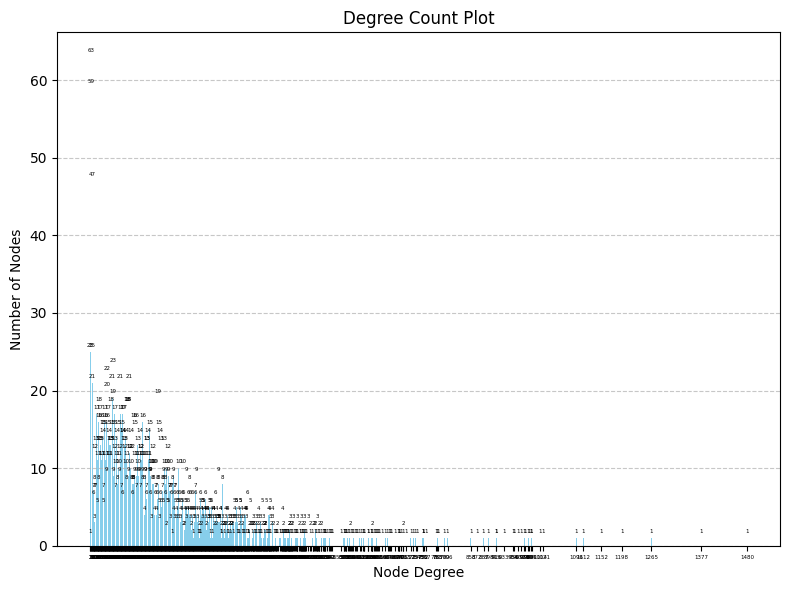

In [20]:
print("Total number of nodes in the graph:", len(DG.nodes()))
print("Total number of edges in the graph after dependency analysis:", len(DG.edges()))
print("Average degree of the graph after dependency analysis:", sum(dict(DG.degree()).values()) / len(DG.nodes()))

# Compute degree count
degree_count = collections.Counter(dict(DG.degree()).values())
degree_data = sorted(degree_count.items())  # List of (degree, count)

# Separate into X and Y for plotting
degrees, counts = zip(*degree_data)

# Create bar plot
plt.figure(figsize=(8, 6))
bars = plt.bar(degrees, counts, color='skyblue')

# Add text labels above bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.5, str(height),
             ha='center', va='bottom', fontsize=4)

# Customize axes and title
plt.xlabel("Node Degree")
plt.ylabel("Number of Nodes")
plt.title("Degree Count Plot")
plt.xticks(degrees, fontsize=4)  # Ensure all degrees are shown
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [22]:
# Get degree dictionary: node -> degree
degree_dict = dict(DG.degree())

# Find min and max degree
min_degree = min(degree_dict.values())
max_degree = max(degree_dict.values())

# Find nodes with min and max degree
nodes_with_min_degree = [node for node, deg in degree_dict.items() if deg == min_degree]
nodes_with_max_degree = [node for node, deg in degree_dict.items() if deg == max_degree]

# Print results
print(f"Minimum degree: {min_degree}")
print(f"Nodes with minimum degree: {nodes_with_min_degree}")
print(f"Maximum degree: {max_degree}")
print(f"Nodes with maximum degree: {nodes_with_max_degree}")


Minimum degree: 1
Nodes with minimum degree: ['s0_ss1_g0_i2']
Maximum degree: 1480
Nodes with maximum degree: ['s3_ss1_g2_i1']


In [23]:
# Print data for nodes with minimum degree
print(f"\n--- Nodes with Minimum Degree ({min_degree}) ---")
for node in nodes_with_min_degree:
    print(f"Node: {node}, Data: {DG.nodes[node]}")

# Print data for nodes with maximum degree
print(f"\n--- Nodes with Maximum Degree ({max_degree}) ---")
for node in nodes_with_max_degree:
    print(f"Node: {node}, Data: {DG.nodes[node]}")



--- Nodes with Minimum Degree (1) ---
Node: s0_ss1_g0_i2, Data: {'label': 'Children who are DLLs may switch between their languages.', 'type': 'indicator', 'age_group': '0-5', 'modality_textual': None, 'perspective': None, 'require_multimodal_context': None, 'embodied': None, 'stage_labels': [0]}

--- Nodes with Maximum Degree (1480) ---
Node: s3_ss1_g2_i1, Data: {'label': 'Draws conclusions, constructs explanations, and verbalizes cause and effect relationships.', 'type': 'indicator', 'age_group': '0-5', 'modality_textual': None, 'perspective': None, 'require_multimodal_context': None, 'embodied': None, 'stage_labels': [0]}


In [24]:
# Get degree dictionary: node -> degree
degree_dict = dict(DG.degree())

# Sort nodes by degree
sorted_by_degree = sorted(degree_dict.items(), key=lambda x: x[1])

# Bottom 5 (lowest degree)
bottom_5 = sorted_by_degree[:5]

# Top 5 (highest degree)
top_5 = sorted_by_degree[-5:]

# Print bottom 5 nodes
print("\n--- Bottom 5 Nodes (Lowest Degree) ---")
for node, degree in bottom_5:
    print(f"Node: {node}, Degree: {degree}, Data: {DG.nodes[node]}")

# Print top 5 nodes
print("\n--- Top 5 Nodes (Highest Degree) ---")
for node, degree in reversed(top_5):  # reverse to print in descending order
    print(f"Node: {node}, Degree: {degree}, Data: {DG.nodes[node]}")


--- Bottom 5 Nodes (Lowest Degree) ---
Node: s0_ss1_g0_i2, Degree: 1, Data: {'label': 'Children who are DLLs may switch between their languages.', 'type': 'indicator', 'age_group': '0-5', 'modality_textual': None, 'perspective': None, 'require_multimodal_context': None, 'embodied': None, 'stage_labels': [0]}
Node: s1_ss0, Degree: 2, Data: {'label': 'Phonological Awareness', 'type': 'sub-skill', 'age_group': '0-5', 'modality_textual': None, 'perspective': None, 'require_multimodal_context': None, 'embodied': None, 'stage_labels': []}
Node: s1_ss3, Degree: 2, Data: {'label': 'Writing', 'type': 'sub-skill', 'age_group': '0-5', 'modality_textual': None, 'perspective': None, 'require_multimodal_context': None, 'embodied': None, 'stage_labels': []}
Node: s2_ss0_g0, Degree: 2, Data: {'label': 'Child knows number names and the count sequence.', 'type': 'goal', 'age_group': '0-5', 'modality_textual': None, 'perspective': None, 'require_multimodal_context': None, 'embodied': None, 'stage_labels

In [25]:


# Assume G is your large directed graph
G = DG
# G.add_edges_from(...)  # Your data here

# Basic summary
print("Is Directed:", G.is_directed())
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())

# Degree stats
in_degrees = dict(G.in_degree())
out_degrees = dict(G.out_degree())

print("Max in-degree:", max(in_degrees.values()))
print("Max out-degree:", max(out_degrees.values()))
print("Average in-degree:", sum(in_degrees.values()) / G.number_of_nodes())
print("Average out-degree:", sum(out_degrees.values()) / G.number_of_nodes())

# Top nodes by in/out-degree
top_in = sorted(in_degrees.items(), key=lambda x: x[1], reverse=True)[:10]
top_out = sorted(out_degrees.items(), key=lambda x: x[1], reverse=True)[:10]
print("Top 10 nodes by in-degree:", top_in)
print("Top 10 nodes by out-degree:", top_out)

# Graph structure
print("Is acyclic (DAG)?", nx.is_directed_acyclic_graph(G))
print("Number of strongly connected components:", nx.number_strongly_connected_components(G))
print("Number of weakly connected components:", nx.number_weakly_connected_components(G))

# If the graph is not a DAG, show one small cycle (if any)
if not nx.is_directed_acyclic_graph(G):
    try:
        cycle = next(nx.simple_cycles(G))
        print("Sample cycle:", cycle)
    except StopIteration:
        print("No simple cycles found.")

# Component size stats
sccs = list(nx.strongly_connected_components(G))
largest_scc = max(sccs, key=len)
print("Size of largest strongly connected component:", len(largest_scc))

# Optional: PageRank or centrality
pagerank = nx.pagerank(G, alpha=0.85)
top_pagerank = sorted(pagerank.items(), key=lambda x: x[1], reverse=True)[:10]
print("Top 10 nodes by PageRank:", top_pagerank)


Is Directed: True
Number of nodes: 3118
Number of edges: 247386
Max in-degree: 632
Max out-degree: 1340
Average in-degree: 79.34124438742784
Average out-degree: 79.34124438742784
Top 10 nodes by in-degree: [('s20_ss1_g5_i11', 632), ('s20_ss0_g0_i8', 575), ('s20_ss1_g5_i7', 565), ('s20_ss0_g0_i9', 548), ('s7_ss1_g4_i24', 509), ('s7_ss1_g4_i32', 509), ('s7_ss1_g4_i40', 507), ('s20_ss0_g3_i20', 500), ('s7_ss1_g4_i15', 498), ('s20_ss0_g3_i32', 487)]
Top 10 nodes by out-degree: [('s7_ss0_g5_i12', 1340), ('s3_ss1_g2_i1', 1169), ('s5_ss2_g1_i0', 1071), ('s7_ss2_g0_i27', 1044), ('s20_ss0_g3_i2', 1038), ('s7_ss1_g2_i3', 1030), ('s7_ss2_g0_i22', 997), ('s7_ss0_g1_i0', 972), ('s12_ss5_g1_i1', 918), ('s7_ss0_g4_i50', 916)]
Is acyclic (DAG)? False
Number of strongly connected components: 517
Number of weakly connected components: 1
Sample cycle: ['s9_ss5_g0_i14', 's9_ss0_g2_i14', 's15_ss0_g3_i0', 's3_ss1_g2_i2', 's3_ss1_g2_i3', 's7_ss2_g3_i8', 's7_ss2_g3_i13', 's7_ss2_g3_i17', 's7_ss2_g3_i20', 's8_

In [45]:

# Get all weakly connected components
wccs = list(nx.weakly_connected_components(G))

print(f"Number of weakly connected components: {len(wccs)}")
print("Weakly connected components (showing up to 5):")
# for i, component in enumerate(wccs[:5]):
#     print(f"Component {i+1} (size {len(component)}):", component)

# (Optional) If you want to sort by size
sorted_wccs = sorted(wccs, key=lambda x: len(x), reverse=True)
print("\nLargest weakly connected component size:", len(sorted_wccs[0]))

Number of weakly connected components: 1
Weakly connected components (showing up to 5):

Largest weakly connected component size: 3118


Number of strongly connected components: 517
strongly connected components (showing up to 5):
Component 1 (size 1): {'s0'}
Component 2 (size 1): {'s0_ss0'}
Component 3 (size 1): {'s0_ss0_g0'}
Component 4 (size 1): {'s0_ss0_g1'}
Component 5 (size 1): {'s0_ss1'}

Largest strongly connected component size: 2598


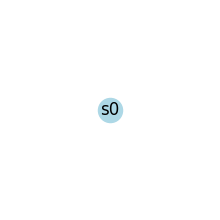

In [46]:
# Optional: visualization of a subgraph
# Get all strongly connected components
sccs = list(nx.strongly_connected_components(G))

print(f"Number of strongly connected components: {len(sccs)}")
print("strongly connected components (showing up to 5):")
for i, component in enumerate(sccs[:5]):
    print(f"Component {i+1} (size {len(component)}):", component)

# (Optional) If you want to sort by size
sorted_sccs = sorted(sccs, key=lambda x: len(x), reverse=True)
print("\nLargest strongly connected component size:", len(sorted_sccs[0]))
sample_nodes = sccs[0]
subG = G.subgraph(sample_nodes)

plt.figure(figsize=(2, 2))
pos = nx.spring_layout(subG, seed=42)
nx.draw(subG, pos, with_labels=True, node_size=300, node_color="lightblue", arrows=True)
plt.show()

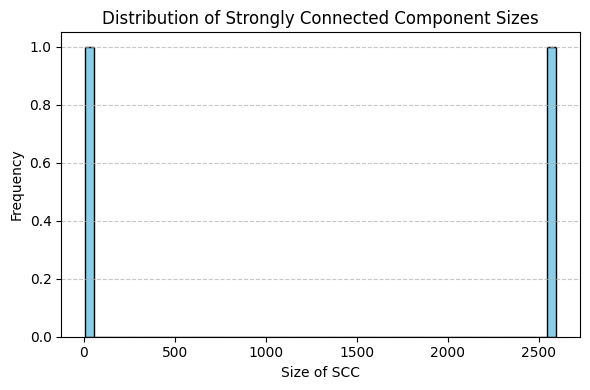

In [47]:
for s in sorted_sccs:
    if len(s) > 10 and len(s) < 1000:
        print(f"Component size: {len(s)}")
        subG = G.subgraph(s)
        plt.figure(figsize=(10, 8))
        pos = nx.spring_layout(subG, seed=42)
        nx.draw(subG, pos, with_labels=True, node_size=300, node_color="lightblue", arrows=True)
        plt.show()
        break
#Visualization of distribution of the log sccs
from math import log

scc_sizes = [len(scc) for scc in sccs if len(scc) > 1]  # avoid log(0)

plt.figure(figsize=(6, 4))
plt.hist(scc_sizes, bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Strongly Connected Component Sizes')
plt.xlabel('Size of SCC')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [49]:
# only graph woth nodes of type "indicator"
DG_ind = DG.subgraph([n for n, d in DG.nodes(data=True) if d['type'] == "indicator"])


In [50]:
from collections import defaultdict

# Initialize counters
age_group_in_degree = defaultdict(int)
age_group_out_degree = defaultdict(int)

for node in DG_ind.nodes():
    age_group = DG_ind.nodes[node].get('age_group', 'Unknown')
    in_deg = DG_ind.in_degree(node)
    out_deg = DG_ind.out_degree(node)
    
    age_group_in_degree[age_group] += in_deg
    age_group_out_degree[age_group] += out_deg

# Combine and display the results
print(f"{'Age Group':<15} {'In-Degree':>10} {'Out-Degree':>12}")
print("-" * 40)
for group in sorted(set(age_group_in_degree.keys()) | set(age_group_out_degree.keys())):
    in_deg = age_group_in_degree.get(group, 0)
    out_deg = age_group_out_degree.get(group, 0)
    print(f"{group:<15} {in_deg:>10} {out_deg:>12}")


Age Group        In-Degree   Out-Degree
----------------------------------------
0-5                   7610        24960
11-14               104825        42348
5-11                131854       176981


In [53]:
from collections import defaultdict

# Initialize dictionaries to store counts for incoming and outgoing connections
outgoing_connections = defaultdict(lambda: defaultdict(int))

# Iterate over each node to find outgoing and incoming connections
for node in DG_ind.nodes():
    node_age_group = DG_ind.nodes[node].get('age_group', 'Unknown')
    
    # Go through all outgoing neighbors of the node
    for neighbor in DG_ind.successors(node):
        neighbor_age_group = DG_ind.nodes[neighbor].get('age_group', 'Unknown')
        
        # Outgoing connection: node -> neighbor
        outgoing_connections[node_age_group][neighbor_age_group] += 1

# Print the Outgoing Connections Table
print("\n" + "-" * 50)
print(f"{'Age Group 1':<15} {'Age Group 2':<15} {'Outgoing Connections'}")
print("-" * 50)
for age_group1 in sorted(outgoing_connections.keys()):
    for age_group2, count in outgoing_connections[age_group1].items():
        print(f"{age_group1:<15} {age_group2:<15} {count:>20}")



--------------------------------------------------
Age Group 1     Age Group 2     Outgoing Connections
--------------------------------------------------
0-5             0-5                             2099
0-5             5-11                           15170
0-5             11-14                           7691
11-14           0-5                              672
11-14           5-11                           18737
11-14           11-14                          22939
5-11            0-5                             4839
5-11            5-11                           97947
5-11            11-14                          74195


In [57]:
from collections import defaultdict
import pandas as pd

# Initialize dictionary to store outgoing connection counts
outgoing_connections = defaultdict(lambda: defaultdict(int))

# Iterate over each node to count outgoing connections by last stage label
for node in DG_ind.nodes():
    stage_list = DG_ind.nodes[node].get('stage_labels', [])
    if not stage_list:
        continue  # skip if no stage info

    node_stage = stage_list[-1]  # take the last stage label

    for neighbor in DG_ind.successors(node):
        neighbor_stage_list = DG_ind.nodes[neighbor].get('stage_labels', [])
        if not neighbor_stage_list:
            continue

        neighbor_stage = neighbor_stage_list[-1]  # take the last stage label

        outgoing_connections[node_stage][neighbor_stage] += 1

# Convert to a pandas DataFrame for a nice confusion matrix
conf_matrix = pd.DataFrame(outgoing_connections).fillna(0).astype(int)
conf_matrix = conf_matrix.sort_index().T.sort_index().T  # sort rows and columns

# Print the confusion matrix
print("\nConfusion Matrix (Outgoing Connections by Last Stage Label):")
print(conf_matrix)



Confusion Matrix (Outgoing Connections by Last Stage Label):
      0     1     2     3     4     5     6     7     8     9
0  2099  1467  1055   833   602   427   455   288   212   172
1  2069  2447  1860  1546  1275   900   921   536   377   298
2  2367  3160  2400  1948  1548  1146  1228   762   540   446
3  2852  4117  3639  3218  2458  1891  2260  1303   973   764
4  2573  3905  3610  3215  2588  1864  2085  1416  1055   817
5  2224  3560  3371  3158  2746  2045  2138  1538  1181   937
6  3085  4937  4766  4997  4006  3152  3842  2352  1894  1548
7  2067  3320  3462  3361  3046  2579  3001  2067  1663  1398
8  2386  3890  4170  4136  3752  3078  3818  2689  2248  1773
9  3238  5264  5790  6188  5186  4163  5991  3936  3860  3305



Confusion Matrix (Outgoing Connections by Last Stage Label):
      0     1     2     3     4     5     6     7     8     9
0  2099  2069  2367  2852  2573  2224  3085  2067  2386  3238
1  1467  2447  3160  4117  3905  3560  4937  3320  3890  5264
2  1055  1860  2400  3639  3610  3371  4766  3462  4170  5790
3   833  1546  1948  3218  3215  3158  4997  3361  4136  6188
4   602  1275  1548  2458  2588  2746  4006  3046  3752  5186
5   427   900  1146  1891  1864  2045  3152  2579  3078  4163
6   455   921  1228  2260  2085  2138  3842  3001  3818  5991
7   288   536   762  1303  1416  1538  2352  2067  2689  3936
8   212   377   540   973  1055  1181  1894  1663  2248  3860
9   172   298   446   764   817   937  1548  1398  1773  3305


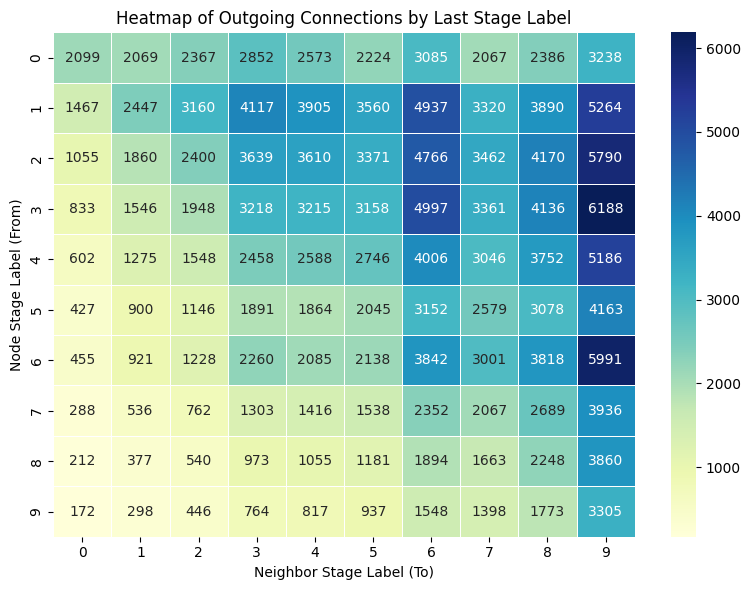

In [62]:
from collections import defaultdict
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize dictionary to store outgoing connection counts
outgoing_connections = defaultdict(lambda: defaultdict(int))

# Iterate over each node to count outgoing connections by last stage label
for node in DG_ind.nodes():
    stage_list = DG_ind.nodes[node].get('stage_labels', [])
    if not stage_list:
        continue

    node_stage = stage_list[-1]  # last stage label

    for neighbor in DG_ind.successors(node):
        neighbor_stage_list = DG_ind.nodes[neighbor].get('stage_labels', [])
        if not neighbor_stage_list:
            continue

        neighbor_stage = neighbor_stage_list[-1]
        outgoing_connections[node_stage][neighbor_stage] += 1

# Convert to DataFrame
conf_matrix = pd.DataFrame(outgoing_connections).fillna(0).astype(int)
conf_matrix = conf_matrix.sort_index().T.sort_index()  # sort rows and columns

# Print the confusion matrix
print("\nConfusion Matrix (Outgoing Connections by Last Stage Label):")
print(conf_matrix)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu", cbar=True, linewidths=0.5)
plt.title("Heatmap of Outgoing Connections by Last Stage Label")
plt.xlabel("Neighbor Stage Label (To)")
plt.ylabel("Node Stage Label (From)")
plt.tight_layout()
plt.show()


In [ ]:
bad_nodes = []
for node in DG_ind.nodes():
    stage_list = DG_ind.nodes[node].get('stage_labels', [])
    if not stage_list:
        continue

    node_stage = stage_list[-1]  # last stage label
    if node_stage == 9:
        for neighbor in DG_ind.successors(node):
            neighbor_stage_list = DG_ind.nodes[neighbor].get('stage_labels', [])
            if not neighbor_stage_list:
                continue
            neighbor_stage = neighbor_stage_list[-1]
            if neighbor_stage == 0:
                bad_nodes.append((node, neighbor))

In [64]:
len(bad_nodes)

172

In [74]:
nn = []
for ii in range(10):
    # print the data for the first bad node
    print(DG_ind.nodes[bad_nodes[ii][0]])
    print(DG_ind.nodes[bad_nodes[ii][1]])
    # nn.append(DG_ind.nodes[bad_nodes[ii][1]]["label"])
    print("--------------------------------------------------")

{'label': 'Understand the standard form for representing large and small numbers.', 'type': 'indicator', 'age_group': '11-14', 'modality_textual': None, 'perspective': None, 'require_multimodal_context': None, 'embodied': None, 'stage_labels': [9]}
{'label': 'Analyzes and interprets data and summarizes results of investigation.', 'type': 'indicator', 'age_group': '0-5', 'modality_textual': None, 'perspective': None, 'require_multimodal_context': None, 'embodied': None, 'stage_labels': [0]}
--------------------------------------------------
{'label': 'Understand that when a number is rounded there are upper and lower limits for the original number.', 'type': 'indicator', 'age_group': '11-14', 'modality_textual': None, 'perspective': None, 'require_multimodal_context': None, 'embodied': None, 'stage_labels': [9]}
{'label': 'Analyzes and interprets data and summarizes results of investigation.', 'type': 'indicator', 'age_group': '0-5', 'modality_textual': None, 'perspective': None, 'requi